First things first, let's import our dataset and check the type of variables

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

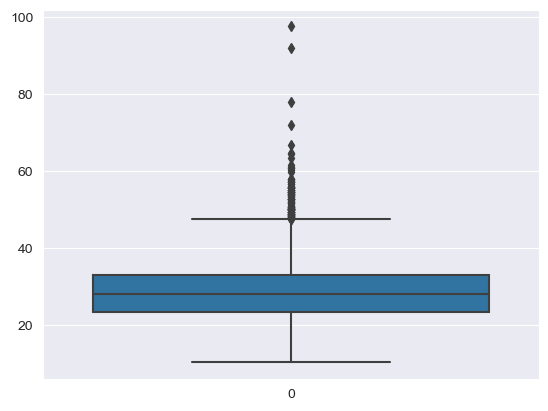

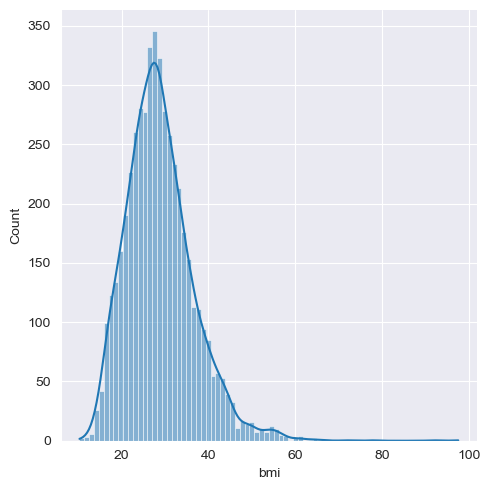

In [6]:
sns.boxplot(data.bmi)
sns.displot(data.bmi, kde=True)

In [7]:
print(data['bmi'].mean())
print(data['bmi'].median())

28.893236911794673
28.1


In [8]:
bmi_median=data['bmi'].median()
data['bmi']=data['bmi'].fillna(bmi_median)

data=data.drop(columns=['id'])

In [9]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data_copy = data.copy(deep = True)

data_copy["hypertension"] = np.where(data_copy["hypertension"] == 0, "No", "Yes")
data_copy["heart_disease"] = np.where(data_copy["heart_disease"] == 0, "No", "Yes")
data_copy["stroke"] = np.where(data_copy["stroke"] == 0, "No", "Yes")

In [11]:
data_copy.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.1,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


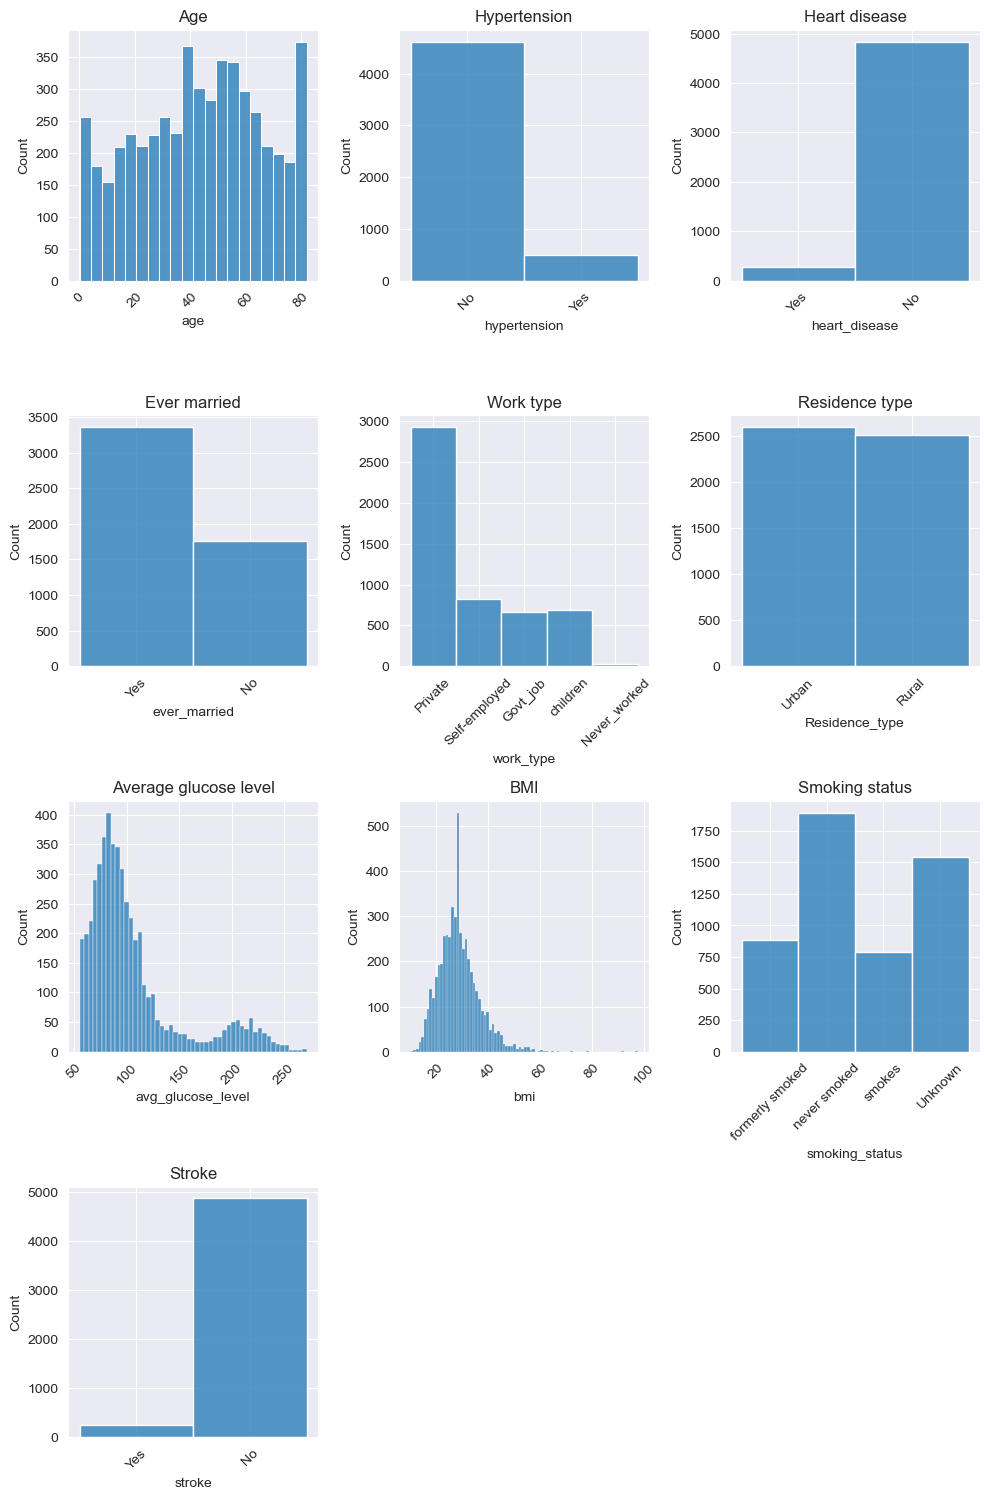

In [12]:
cols = list(data_copy.columns)
cols_data=cols[1:]

labels= ['Age',
          'Hypertension',
          'Heart disease',
          'Ever married',
          'Work type',
          'Residence type',
          'Average glucose level',
          'BMI',
          'Smoking status',
          'Stroke']

plt.figure(figsize=(10,30))
for i in range(len(cols_data)):
    plt.subplot(8,3,i+1)
    plt.title(labels[i])
    plt.xticks(rotation=45)
    sns.histplot(data_copy[cols_data[i]])

plt.tight_layout()

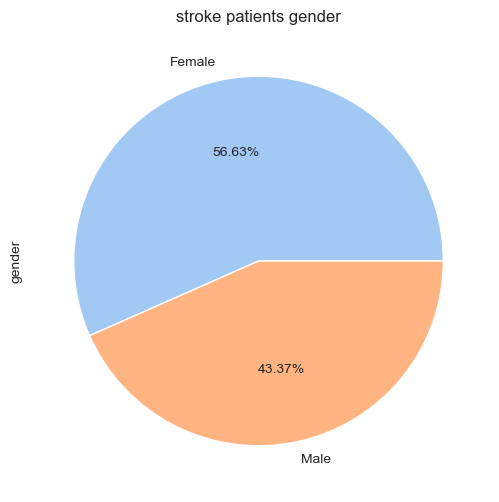

In [13]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['gender'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients gender')

plt.show()

We can see that the most of stroke patients are women, and there are 56.63 percent of all stroke cases

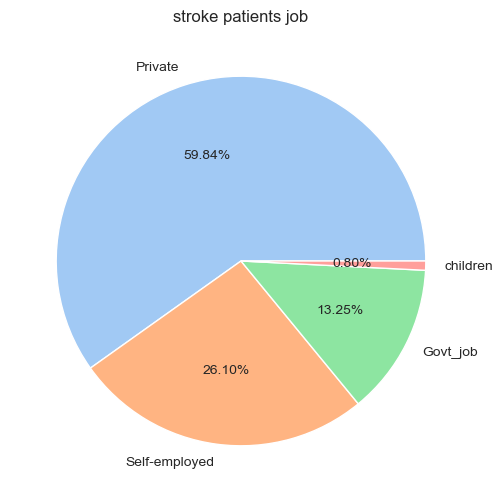

In [14]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['work_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients job')
plt.ylabel(None)

plt.show()

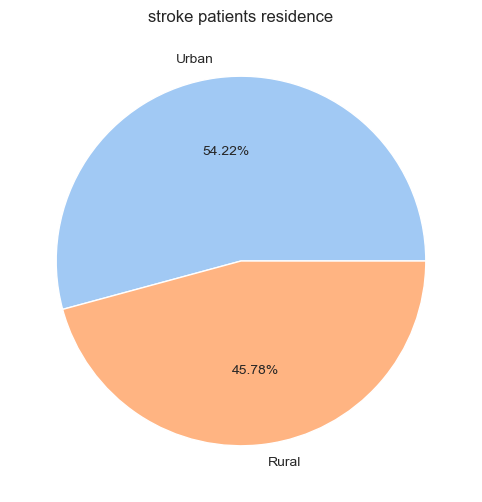

In [15]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:2]

data_stroke['Residence_type'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients residence')
plt.ylabel(None)

plt.show()

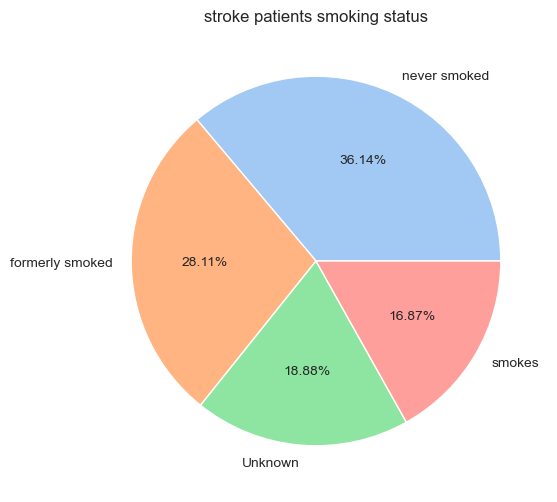

In [16]:
data_stroke=data_copy[data_copy['stroke'].isin(['Yes'])]

colors = sns.color_palette('pastel')[0:4]

data_stroke['smoking_status'].value_counts().plot(kind = "pie", figsize = (9,6), colors=colors, autopct='%.02f%%')
plt.title('stroke patients smoking status')
plt.ylabel(None)

plt.show()

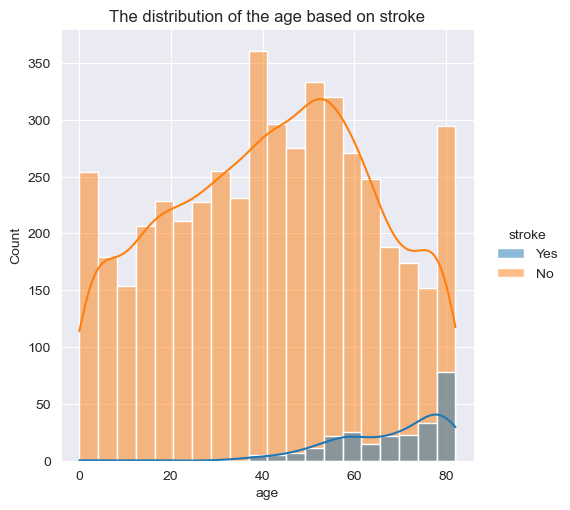

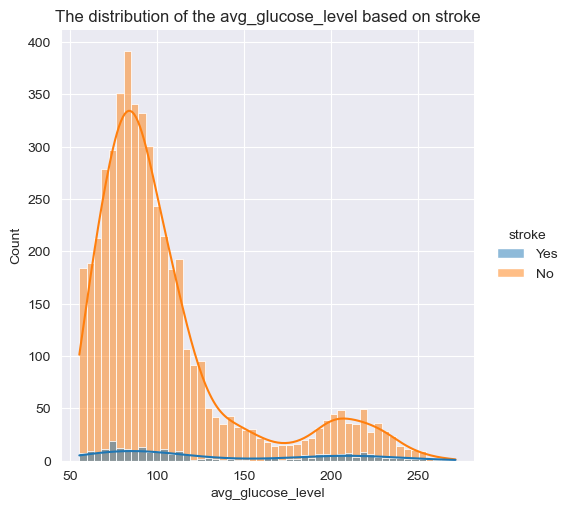

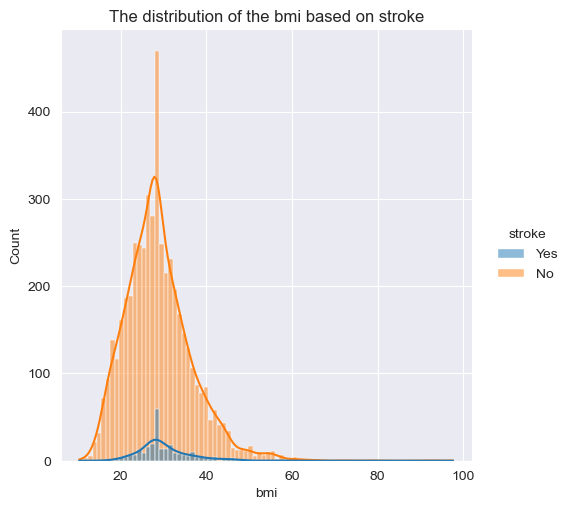

In [17]:
for i in data_copy.columns[:-1]:
    if data_copy[i].dtype == 'float64':
        sns.displot(data = data_copy, x = i, hue = 'stroke', kde = True)
        plt.title('The distribution of the {} based on stroke'.format(i))
        plt.show()

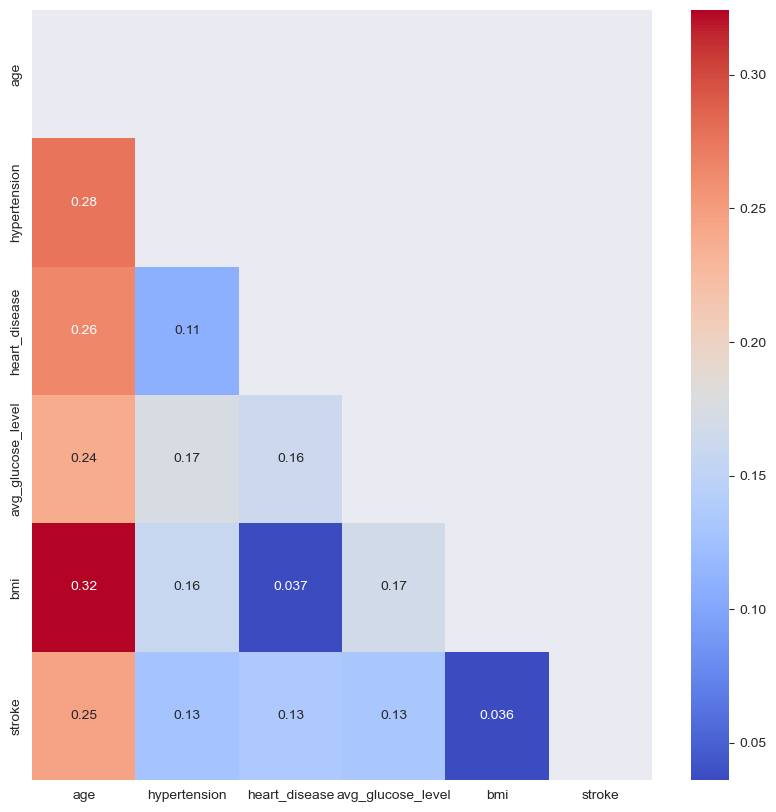

In [18]:
plt.figure(figsize=(10,10))
cor=data.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot = True, cmap=plt.cm.coolwarm)
plt.show()

We can see that age is the most significant factor affecting the occurence of a stroke.

 ### Scikit-learn model

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [20]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [23]:
X_cat = data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
X_num = data.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke'], axis = 1)

X_cat = pd.get_dummies(X_cat)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)
X = pd.concat([X_scaled, X_cat], axis = 1)

y = data['stroke']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 444)

In [25]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4088, 21)
Shape of X_test:  (1022, 21)
Shape of y_train:  (4088,)
Shape of y_test:  (1022,)


In [26]:
print('Before OverSampling, counts of label 1: ', sum(y_train==1))
print('Before OverSampling, counts of label 0: ', sum(y_train==0))

sm = SMOTE()
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: ', X_train_resampled.shape)
print('After OverSampling, the shape of train_y: ', y_train_resampled.shape)

print('After OverSampling, counts of label 1: ', sum(y_train_resampled==1))
print('After OverSampling, counts of label 0: ', sum(y_train_resampled==0))


Before OverSampling, counts of label 1:  215
Before OverSampling, counts of label 0:  3873
After OverSampling, the shape of train_X:  (7746, 21)
After OverSampling, the shape of train_y:  (7746,)
After OverSampling, counts of label 1:  3873
After OverSampling, counts of label 0:  3873


In [36]:
names = ['Logistic Regression', 'RandomForest Classifier', 'K-Nearest Neighbors Classifier', 'AdaBoost Classifier', 'Decision Tree Classifier', 'Gaussian Naive Bayes','Bernoulli Naive Bayes', 'SVC', ]

models = [LogisticRegression(random_state=444), RandomForestClassifier(random_state=444), KNeighborsClassifier(),  AdaBoostClassifier(random_state=444), DecisionTreeClassifier(random_state=444), GaussianNB(), BernoulliNB(), SVC(random_state=444)]

results = pd.DataFrame(columns = ['accuracy score', 'recall score', 'precision score', 'f-1 score', 'ROC AUC score'], index = names)

accuracy=[]
recall=[]
precision=[]
roc_auc=[]
f1=[]

for model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    score_a = accuracy_score(y_test, y_pred)
    score_rec = recall_score(y_test, y_pred)
    score_p = precision_score(y_test, y_pred)
    score_roc = roc_auc_score(y_test, y_pred)
    score_f1=f1_score(y_test, y_pred)

    accuracy.append(score_a)
    recall.append(score_rec)
    precision.append(score_p)
    roc_auc.append(score_roc)
    f1.append(score_f1)

results['accuracy score'] = accuracy
results['recall score'] = recall
results['precision score'] = precision
results['f-1 score'] = f1
results['ROC AUC score'] = roc_auc
results.sort_values(by = 'accuracy score', ascending = False)

,accuracy score,recall score,precision score,f-1 score,ROC AUC score
RandomForest Classifier,0.925636,0.147059,0.096154,0.116279,0.549744
SVC,0.905088,0.382353,0.146067,0.211382,0.652715
Logistic Regression,0.898239,0.294118,0.111111,0.161290,0.606573
Decision Tree Classifier,0.875734,0.176471,0.057143,0.086331,0.538134
K-Nearest Neighbors Classifier,0.857143,0.441176,0.105634,0.170455,0.656317
AdaBoost Classifier,0.831703,0.529412,0.103448,0.173077,0.685759
Bernoulli Naive Bayes,0.601761,0.764706,0.061176,0.113290,0.680430
Gaussian Naive Bayes,0.297456,0.941176,0.042781,0.081841,0.608240


### RandomForest Classifier

In [37]:
def get_score(x):
    rand_forest = RandomForestClassifier(n_estimators=x,  random_state=444)

    rand_forest.fit(X_train_resampled, y_train_resampled)
    y_pred = rand_forest.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    return acc

In [38]:
results_rand_forest = {}
estimators = [10,100,1000,10000]

for i in estimators:
    results_rand_forest[i] = get_score(i)

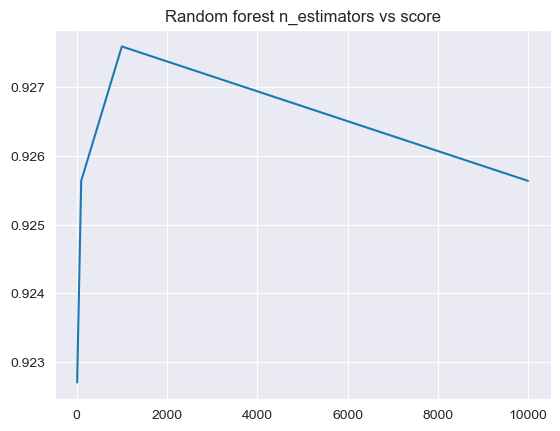

In [39]:
plt.plot(list(results_rand_forest.keys()), list(results_rand_forest.values()))
plt.title("Random forest n_estimators vs score")
plt.show()

In [40]:
rf = RandomForestClassifier(n_estimators=1000, random_state=444)

rf.fit(X_train_resampled, y_train_resampled)
y_pred = rf.predict(X_test)

print('final model accuracy score: %f' %accuracy_score(y_test, y_pred))
print('final model ROC AUC score: %f' %roc_auc_score(y_test, y_pred))

final model accuracy score: 0.927593
final model ROC AUC score: 0.564956


<AxesSubplot:>

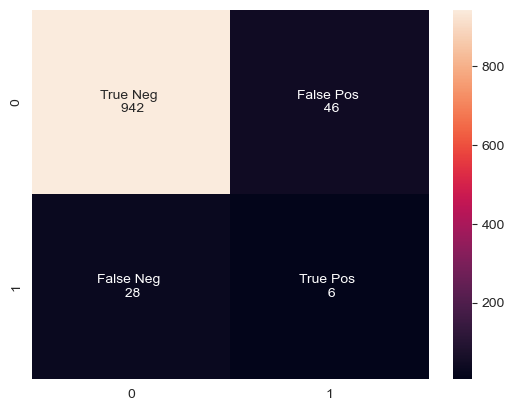

In [41]:
cm = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

labels = [f'{v1} \n {v2}' for v1, v2  in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

<Figure size 900x600 with 0 Axes>

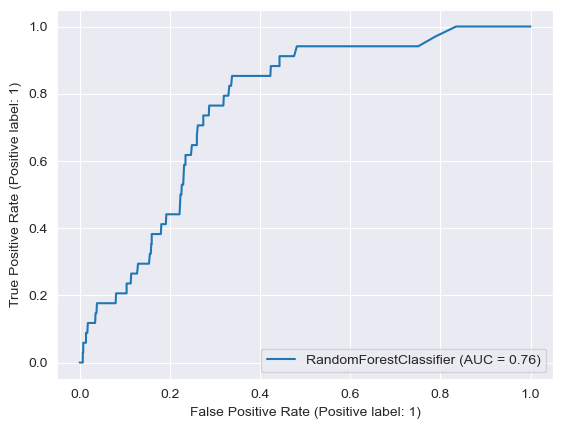

In [42]:
plt.figure(figsize = (9,6))
plot_roc_curve(rf, X_test, y_test)
plt.show()

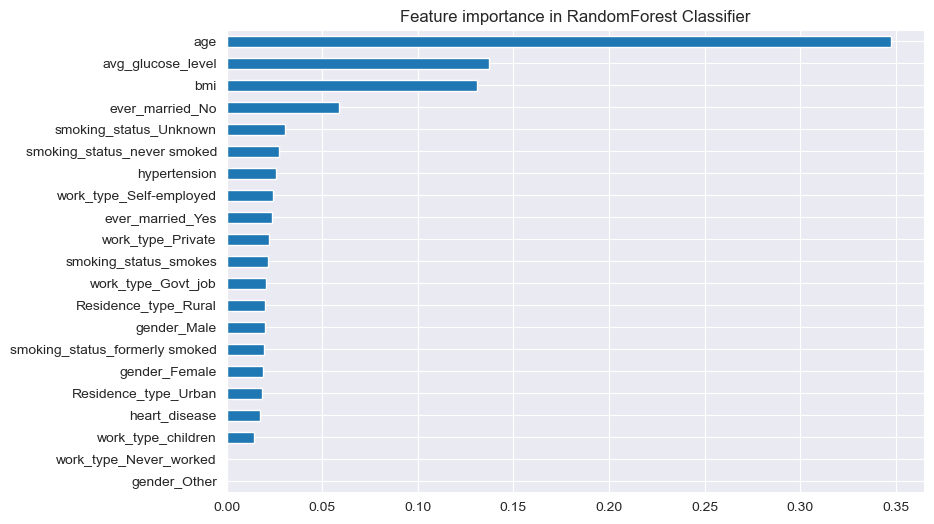

In [43]:
plt.figure(figsize = (9,6))

importances_rf = pd.Series(rf.feature_importances_, index = X.columns)
sort = importances_rf.sort_values()
sort.plot(kind = 'barh')

plt.title('Feature importance in RandomForest Classifier')
plt.show()

### Logistic regression

In [44]:
log_reg = LogisticRegression(random_state=444)

log_reg.fit(X_train_resampled, y_train_resampled)
y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
print('accuracy: %f' %acc)
print('roc_auc: %f' %roc)

accuracy: 0.898239
roc_auc: 0.606573


<AxesSubplot:>

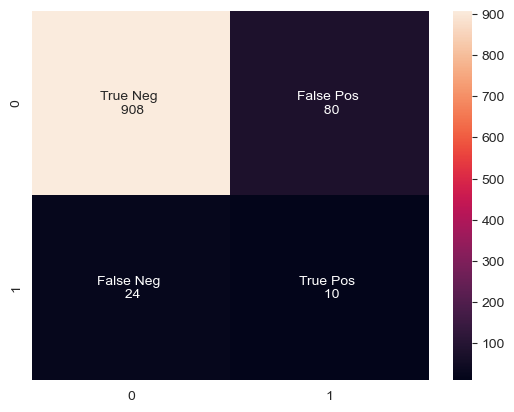

In [45]:
cm = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

labels = [f'{v1} \n {v2}' for v1, v2  in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

<Figure size 900x600 with 0 Axes>

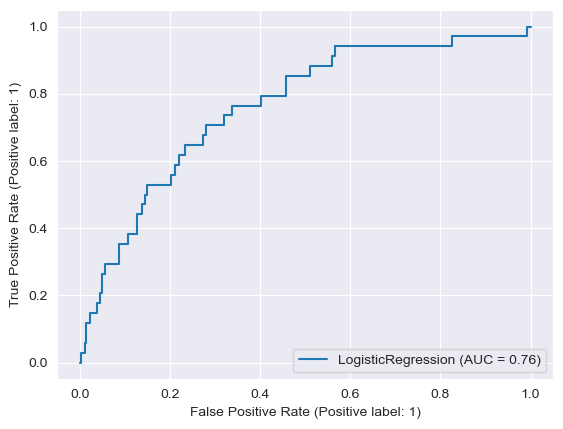

In [46]:
plt.figure(figsize = (9,6))
plot_roc_curve(log_reg, X_test, y_test)
plt.show()

### SVC

In [47]:
svc=SVC(random_state=444, max_iter=-1)

svc.fit(X_train_resampled, y_train_resampled)
y_pred = svc.predict(X_test)

acc = accuracy_score(y_test, y_pred)
roc=roc_auc_score(y_test, y_pred)
print('accuracy: %f' %acc)
print('roc_auc: %f' %roc)

accuracy: 0.905088
roc_auc: 0.652715


<AxesSubplot:>

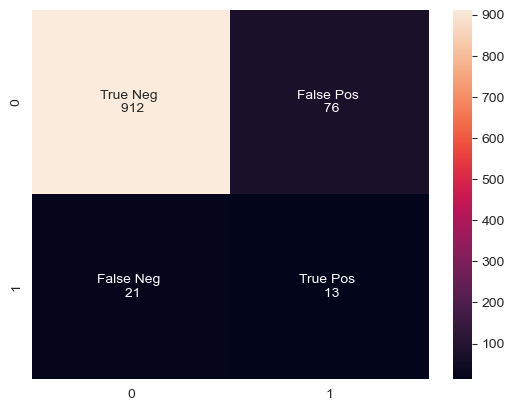

In [48]:
cm = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]

labels = [f'{v1} \n {v2}' for v1, v2  in zip(group_names, group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='')

<Figure size 900x600 with 0 Axes>

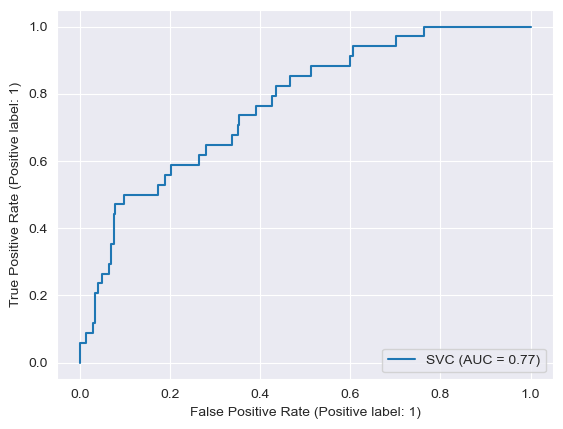

In [49]:
plt.figure(figsize = (9,6))
plot_roc_curve(svc, X_test, y_test)
plt.show()